<a href="https://colab.research.google.com/github/Hitika-Jain/ParkInsight/blob/main/minor_midsem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Available files: ['.config', 'T2W_TSE_002.png', 't2_tse_tra_p2_512_019.png', 't1_mprage_tra_p2_iso_028_copy001.png', 't2_tirm_tra_dark-fluid_pat2_023.png', '3D_Brain_T2_060.png', 't1_mprage_sag_p2_iso_1_069.png', 'T1W_FFE_018.png', 't2_tirm_tra_dark-fluid_022.png', 'BRAIN_PZ_t2_tgse_sag_169.png', 'sample_data']


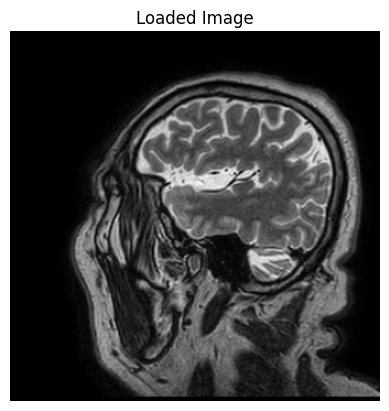

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os

# List files in the working directory to verify the correct path
print("Available files:", os.listdir("/content"))

# Corrected file path
image_path = "/content/3D_Brain_T2_060.png"  # Adjust based on actual location

# Try loading the image
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if image is None:
    print("Error: Image not loaded. Check file path or format.")
else:
    plt.imshow(image, cmap="gray")
    plt.title("Loaded Image")
    plt.axis("off")
    plt.show()


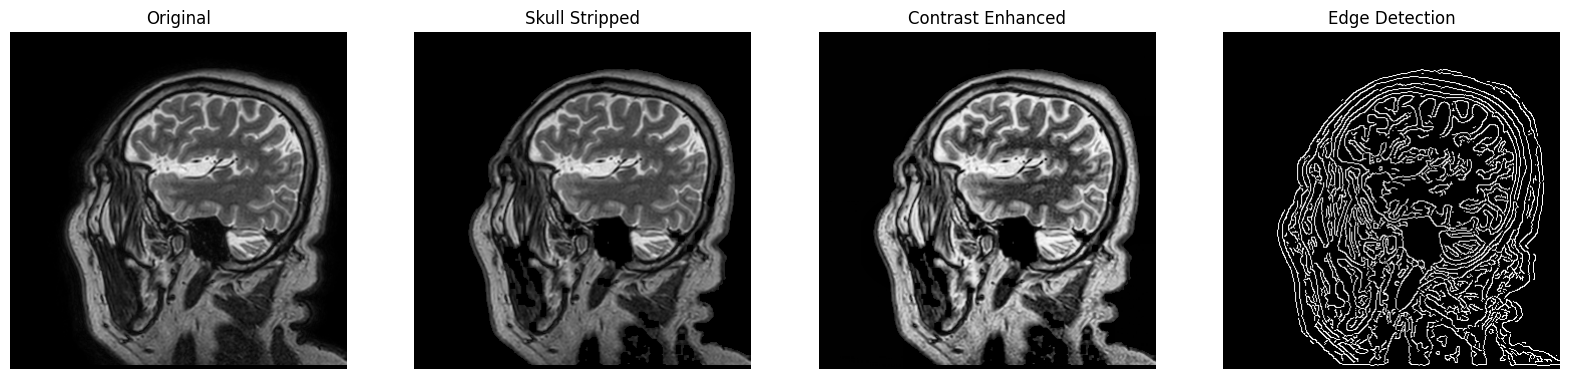

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the MRI image
image_path = "/content/3D_Brain_T2_060.png"  # Update if needed
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Step 1: Skull Stripping (Brain Masking)
def skull_strip(img):
    blurred = cv2.GaussianBlur(img, (5, 5), 0)
    _, thresh = cv2.threshold(blurred, 30, 255, cv2.THRESH_BINARY)  # Adjust threshold as needed
    mask = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, np.ones((5,5), np.uint8))  # Fill small holes
    return cv2.bitwise_and(img, img, mask=mask)

# Step 2: Contrast Enhancement (CLAHE)
def enhance_contrast(img):
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    return clahe.apply(img)

# Step 3: Apply Gaussian Blur
def apply_gaussian_blur(img, kernel_size=(5,5)):
    return cv2.GaussianBlur(img, kernel_size, 0)

# Step 4: Edge Detection (Canny)
def detect_edges(img):
    return cv2.Canny(img, 50, 150)

# Apply preprocessing steps
skull_stripped = skull_strip(image)
enhanced = enhance_contrast(skull_stripped)
blurred = apply_gaussian_blur(enhanced)
edges = detect_edges(blurred)

# Show results
fig, axes = plt.subplots(1, 4, figsize=(20,5))
titles = ["Original", "Skull Stripped", "Contrast Enhanced", "Edge Detection"]
images = [image, skull_stripped, enhanced, edges]

for i, ax in enumerate(axes):
    ax.imshow(images[i], cmap="gray")
    ax.set_title(titles[i])
    ax.axis("off")

plt.show()

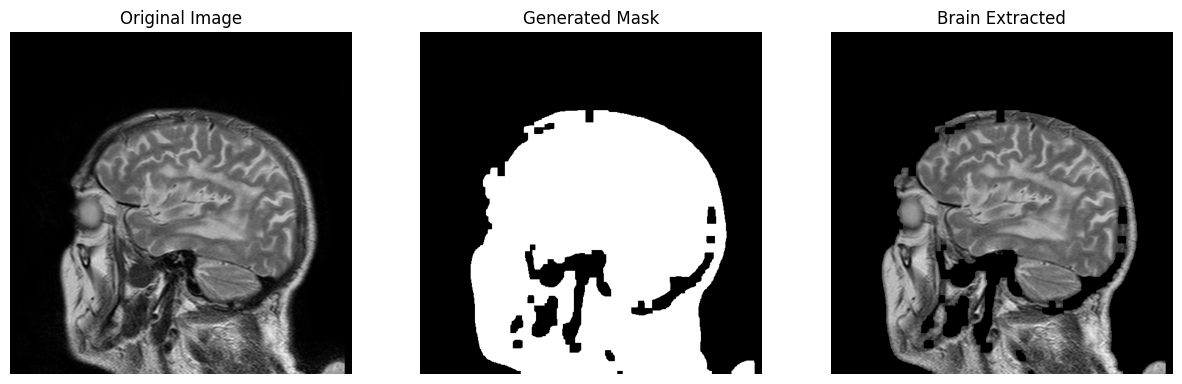

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image_path = "/content/T2W_TSE_002.png"  # Change this to your file path
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if image is None:
    print("Error: Image not loaded. Check file path.")
else:
    # Apply Gaussian Blur to remove noise
    blurred = cv2.GaussianBlur(image, (5, 5), 0)

    # Apply Otsu's Thresholding to create a binary mask
    _, mask = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Apply morphological operations to clean the mask
    kernel = np.ones((5, 5), np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel, iterations=2)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=2)

    # Apply the mask to the original image
    brain_extracted = cv2.bitwise_and(image, image, mask=mask)

    # Display results
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    ax[0].imshow(image, cmap='gray')
    ax[0].set_title("Original Image")
    ax[0].axis("off")

    ax[1].imshow(mask, cmap='gray')
    ax[1].set_title("Generated Mask")
    ax[1].axis("off")

    ax[2].imshow(brain_extracted, cmap='gray')
    ax[2].set_title("Brain Extracted")
    ax[2].axis("off")

    plt.show()


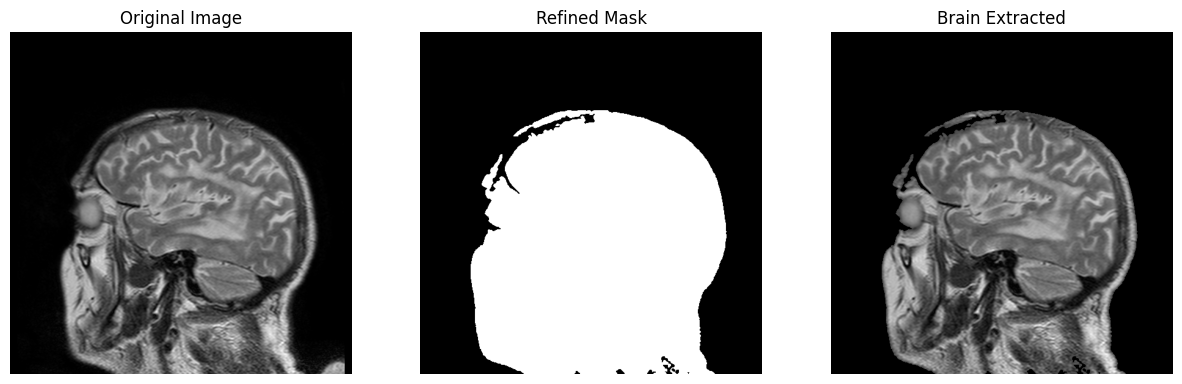

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image_path = "/content/T2W_TSE_002.png"  # Change this if needed
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if image is None:
    print("Error: Image not loaded. Check file path.")
else:
    # Apply Gaussian Blur to remove noise
    blurred = cv2.GaussianBlur(image, (5, 5), 0)

    # Apply Otsu's Thresholding to create a binary mask
    _, mask = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Find contours and keep the largest one (brain region)
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if contours:
        largest_contour = max(contours, key=cv2.contourArea)
        mask = np.zeros_like(image)
        cv2.drawContours(mask, [largest_contour], -1, (255), thickness=cv2.FILLED)

    # Apply the mask to the original image
    brain_extracted = cv2.bitwise_and(image, image, mask=mask)

    # Display results
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    ax[0].imshow(image, cmap='gray')
    ax[0].set_title("Original Image")
    ax[0].axis("off")

    ax[1].imshow(mask, cmap='gray')
    ax[1].set_title("Refined Mask")
    ax[1].axis("off")

    ax[2].imshow(brain_extracted, cmap='gray')
    ax[2].set_title("Brain Extracted")
    ax[2].axis("off")

    plt.show()


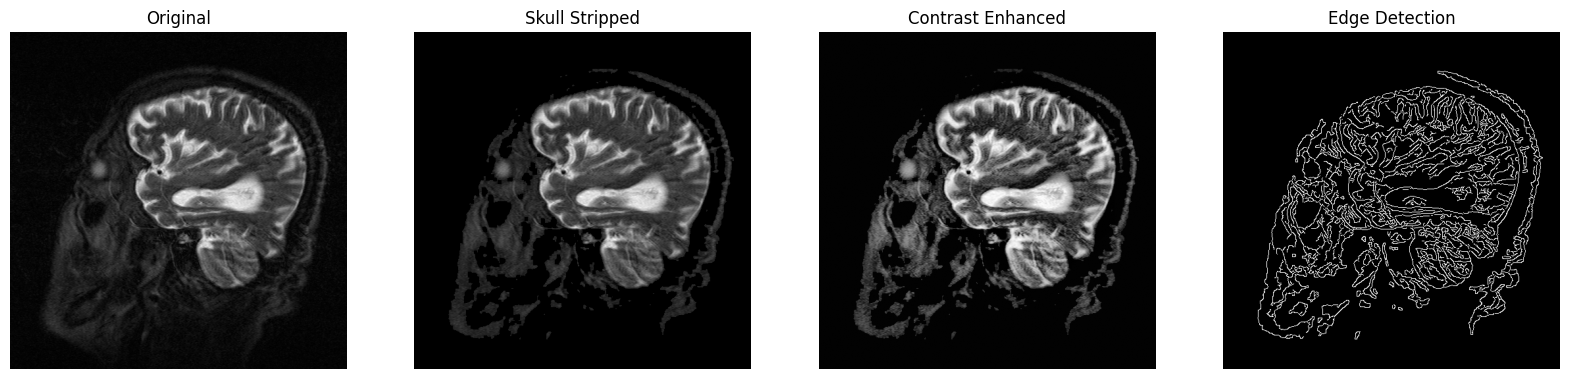

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the MRI image
image_path = "/content/BRAIN_PZ_t2_tgse_sag_169.png"  # Update if needed
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Step 1: Skull Stripping (Brain Masking)
def skull_strip(img):
    blurred = cv2.GaussianBlur(img, (5, 5), 0)
    _, thresh = cv2.threshold(blurred, 30, 255, cv2.THRESH_BINARY)  # Adjust threshold as needed
    mask = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, np.ones((5,5), np.uint8))  # Fill small holes
    return cv2.bitwise_and(img, img, mask=mask)

# Step 2: Contrast Enhancement (CLAHE)
def enhance_contrast(img):
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    return clahe.apply(img)

# Step 3: Apply Gaussian Blur
def apply_gaussian_blur(img, kernel_size=(5,5)):
    return cv2.GaussianBlur(img, kernel_size, 0)

# Step 4: Edge Detection (Canny)
def detect_edges(img):
    return cv2.Canny(img, 50, 150)

# Apply preprocessing steps
skull_stripped = skull_strip(image)
enhanced = enhance_contrast(skull_stripped)
blurred = apply_gaussian_blur(enhanced)
edges = detect_edges(blurred)

# Show results
fig, axes = plt.subplots(1, 4, figsize=(20,5))
titles = ["Original", "Skull Stripped", "Contrast Enhanced", "Edge Detection"]
images = [image, skull_stripped, enhanced, edges]

for i, ax in enumerate(axes):
    ax.imshow(images[i], cmap="gray")
    ax.set_title(titles[i])
    ax.axis("off")

plt.show()

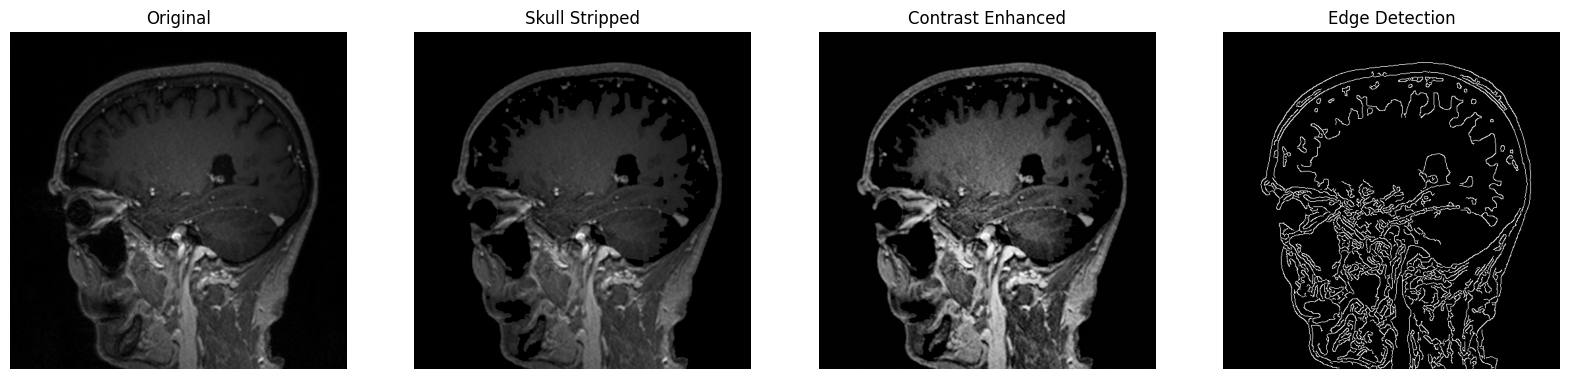

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the MRI image
image_path = "/content/t1_mprage_sag_p2_iso_1_069.png"  # Update if needed
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Step 1: Skull Stripping (Brain Masking)
def skull_strip(img):
    blurred = cv2.GaussianBlur(img, (5, 5), 0)
    _, thresh = cv2.threshold(blurred, 30, 255, cv2.THRESH_BINARY)  # Adjust threshold as needed
    mask = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, np.ones((5,5), np.uint8))  # Fill small holes
    return cv2.bitwise_and(img, img, mask=mask)

# Step 2: Contrast Enhancement (CLAHE)
def enhance_contrast(img):
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    return clahe.apply(img)

# Step 3: Apply Gaussian Blur
def apply_gaussian_blur(img, kernel_size=(5,5)):
    return cv2.GaussianBlur(img, kernel_size, 0)

# Step 4: Edge Detection (Canny)
def detect_edges(img):
    return cv2.Canny(img, 50, 150)

# Apply preprocessing steps
skull_stripped = skull_strip(image)
enhanced = enhance_contrast(skull_stripped)
blurred = apply_gaussian_blur(enhanced)
edges = detect_edges(blurred)

# Show results
fig, axes = plt.subplots(1, 4, figsize=(20,5))
titles = ["Original", "Skull Stripped", "Contrast Enhanced", "Edge Detection"]
images = [image, skull_stripped, enhanced, edges]

for i, ax in enumerate(axes):
    ax.imshow(images[i], cmap="gray")
    ax.set_title(titles[i])
    ax.axis("off")

plt.show()

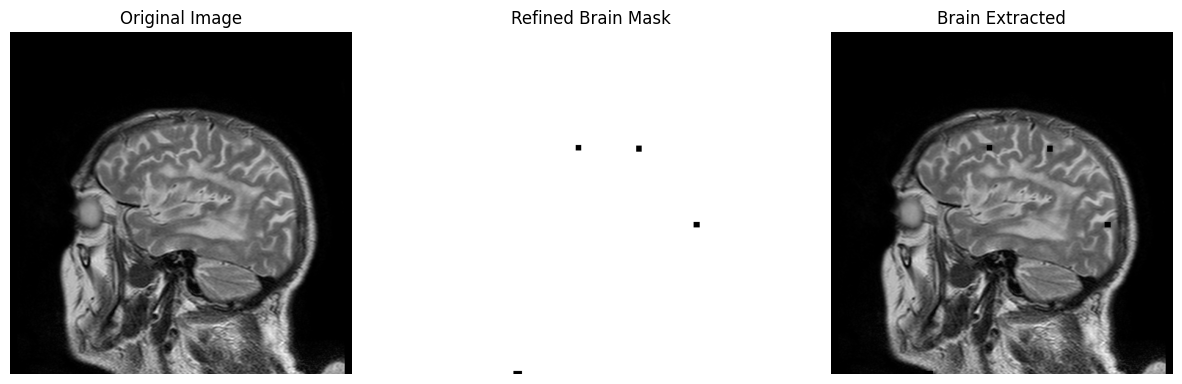

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image_path = "/content/T2W_TSE_002.png"  # Change as needed
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if image is None:
    print("Error: Image not loaded. Check file path.")
else:
    # Step 1: Denoising and Smoothing
    blurred = cv2.GaussianBlur(image, (5, 5), 0)

    # Step 2: Adaptive Thresholding for better segmentation
    mask = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

    # Step 3: Morphological Operations to remove noise
    kernel = np.ones((5,5), np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel, iterations=2)  # Close gaps

    # Step 4: Find the largest connected component (Brain Region)
    num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(mask, connectivity=8)

    # Find the largest component (ignoring the background)
    largest_label = 1 + np.argmax(stats[1:, cv2.CC_STAT_AREA])  # Ignore background (0)
    brain_mask = (labels == largest_label).astype(np.uint8) * 255

    # Step 5: Apply the final refined mask
    brain_extracted = cv2.bitwise_and(image, image, mask=brain_mask)

    # Display Results
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    ax[0].imshow(image, cmap='gray')
    ax[0].set_title("Original Image")
    ax[0].axis("off")

    ax[1].imshow(brain_mask, cmap='gray')
    ax[1].set_title("Refined Brain Mask")
    ax[1].axis("off")

    ax[2].imshow(brain_extracted, cmap='gray')
    ax[2].set_title("Brain Extracted")
    ax[2].axis("off")

    plt.show()


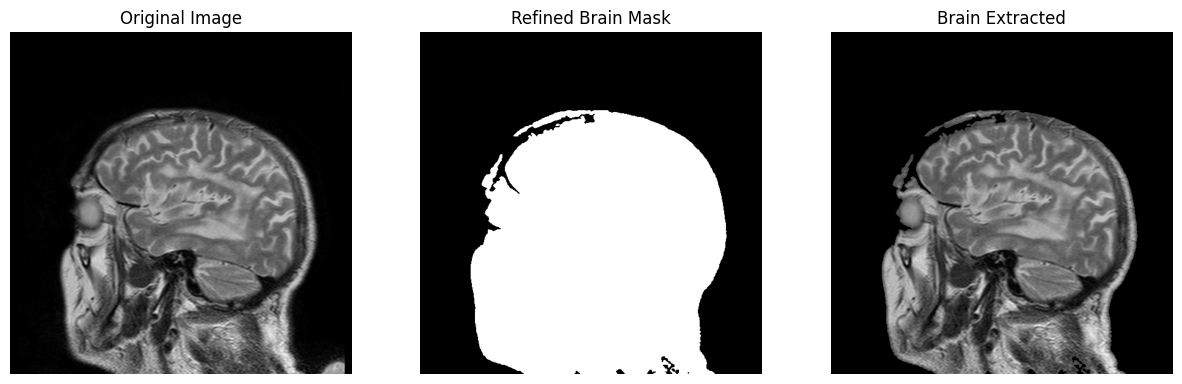

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the MRI image in grayscale
image_path = "/content/T2W_TSE_002.png"  # Change as needed
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if image is None:
    print("Error: Image not loaded. Check file path.")
else:
    # Step 1: Apply Gaussian Blur to smooth the image
    blurred = cv2.GaussianBlur(image, (5, 5), 0)

    # Step 2: Otsu's Thresholding to segment the brain
    _, binary_mask = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Step 3: Find contours and select the largest one (brain region)
    contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Find the largest contour by area
    largest_contour = max(contours, key=cv2.contourArea)

    # Step 4: Create a mask from the largest contour
    brain_mask = np.zeros_like(binary_mask)
    cv2.drawContours(brain_mask, [largest_contour], -1, (255), thickness=cv2.FILLED)

    # Step 5: Apply the mask to the original image
    brain_extracted = cv2.bitwise_and(image, image, mask=brain_mask)

    # Display Results
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    ax[0].imshow(image, cmap='gray')
    ax[0].set_title("Original Image")
    ax[0].axis("off")

    ax[1].imshow(brain_mask, cmap='gray')
    ax[1].set_title("Refined Brain Mask")
    ax[1].axis("off")

    ax[2].imshow(brain_extracted, cmap='gray')
    ax[2].set_title("Brain Extracted")
    ax[2].axis("off")

    plt.show()


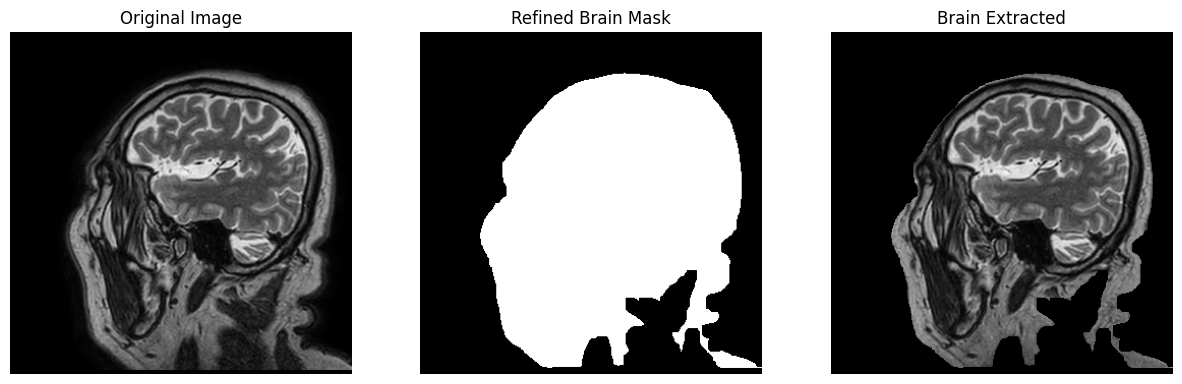

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the MRI image in grayscale
image_path = "/content/3D_Brain_T2_060.png"  # Adjust the path if needed
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if image is None:
    print("Error: Image not loaded. Check file path.")
else:
    # Step 1: Apply Gaussian Blur to reduce noise
    blurred = cv2.GaussianBlur(image, (5, 5), 0)

    # Step 2: Otsu's Thresholding for binary segmentation
    _, binary_mask = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Step 3: Morphological closing to fill small holes in the mask
    kernel = np.ones((5, 5), np.uint8)
    binary_mask = cv2.morphologyEx(binary_mask, cv2.MORPH_CLOSE, kernel)

    # Step 4: Find contours and select the largest one (brain region)
    contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if contours:
        # Find the largest contour by area
        largest_contour = max(contours, key=cv2.contourArea)

        # Step 5: Create a mask from the largest contour
        brain_mask = np.zeros_like(binary_mask)
        cv2.drawContours(brain_mask, [largest_contour], -1, (255), thickness=cv2.FILLED)

        # Step 6: Erode the mask slightly to remove extra outer parts (like hair or skull)
        brain_mask = cv2.erode(brain_mask, np.ones((3, 3), np.uint8), iterations=2)

        # Step 7: Apply the mask to the original image
        brain_extracted = cv2.bitwise_and(image, image, mask=brain_mask)

        # Display Results
        fig, ax = plt.subplots(1, 3, figsize=(15, 5))
        ax[0].imshow(image, cmap='gray')
        ax[0].set_title("Original Image")
        ax[0].axis("off")

        ax[1].imshow(brain_mask, cmap='gray')
        ax[1].set_title("Refined Brain Mask")
        ax[1].axis("off")

        ax[2].imshow(brain_extracted, cmap='gray')
        ax[2].set_title("Brain Extracted")
        ax[2].axis("off")

        plt.show()
    else:
        print("No contours found. Try adjusting the thresholding parameters.")


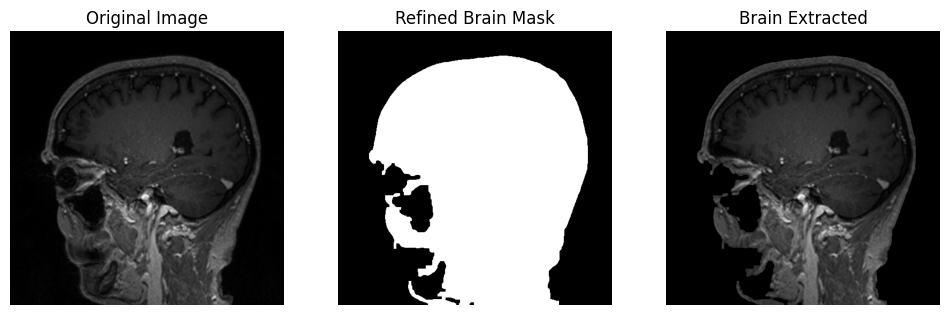

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the MRI image
image_path = "/content/t1_mprage_sag_p2_iso_1_069.png"  # Update this path if needed
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Step 1: Apply Gaussian Blur to Reduce Noise
blurred = cv2.GaussianBlur(image, (7, 7), 0)

# Step 2: Thresholding to Create Initial Brain Mask
_, mask = cv2.threshold(blurred, 40, 255, cv2.THRESH_BINARY)  # Adjust threshold if needed

# Step 3: Remove Small Noise with Morphological Operations
kernel = np.ones((5, 5), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)  # Removes small noise
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)  # Fills small gaps

# Step 4: Find Largest Contour (Assuming Brain is the Largest Component)
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
largest_contour = max(contours, key=cv2.contourArea)

# Step 5: Create a Refined Mask Using Convex Hull
refined_mask = np.zeros_like(mask)
cv2.drawContours(refined_mask, [largest_contour], -1, 255, thickness=cv2.FILLED)

# Step 6: Apply Mask to Extract the Brain
brain_extracted = cv2.bitwise_and(image, image, mask=refined_mask)

# Plot Results
fig, axes = plt.subplots(1, 3, figsize=(12, 5))

axes[0].imshow(image, cmap='gray')
axes[0].set_title("Original Image")

axes[1].imshow(refined_mask, cmap='gray')
axes[1].set_title("Refined Brain Mask")

axes[2].imshow(brain_extracted, cmap='gray')
axes[2].set_title("Brain Extracted")

for ax in axes:
    ax.axis("off")

plt.show()


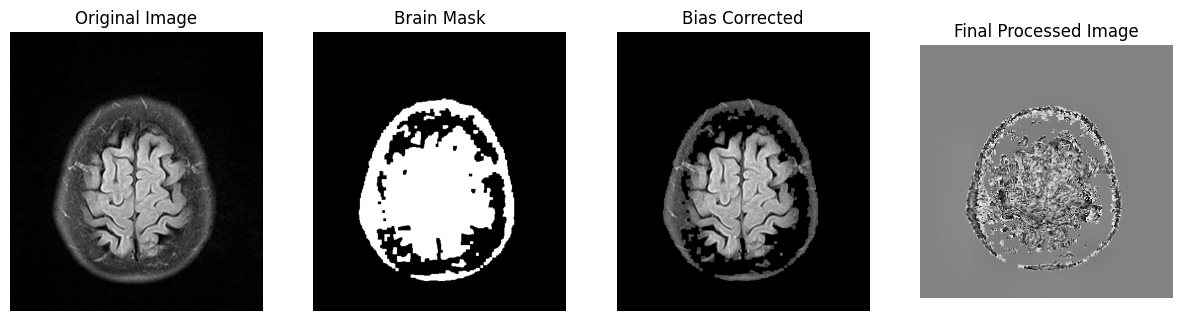

In [ ]:
import cv2
import numpy as np
import SimpleITK as sitk
import matplotlib.pyplot as plt

def preprocess_mri(image_path):
    # 1️⃣ Load Image (Grayscale)
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # 2️⃣ Skull-Stripping using Otsu’s Thresholding
    _, brain_mask = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # 3️⃣ Morphological Operations to Refine Mask
    kernel = np.ones((5, 5), np.uint8)
    brain_mask = cv2.morphologyEx(brain_mask, cv2.MORPH_CLOSE, kernel)  # Close small holes
    brain_mask = cv2.morphologyEx(brain_mask, cv2.MORPH_OPEN, kernel)   # Remove noise

    # 4️⃣ Apply Brain Mask to Original Image
    brain_extracted = cv2.bitwise_and(image, image, mask=brain_mask)

    # 5️⃣ N4 Bias Field Correction (Corrects Intensity Variations)
    sitk_image = sitk.GetImageFromArray(brain_extracted.astype(np.float32))
    mask = sitk.GetImageFromArray(brain_mask.astype(np.uint8))
    corrector = sitk.N4BiasFieldCorrectionImageFilter()
    corrected_image = corrector.Execute(sitk_image, mask)
    brain_corrected = sitk.GetArrayFromImage(corrected_image)

    # 6️⃣ Normalize Intensity (Z-score Normalization)
    brain_corrected = (brain_corrected - np.mean(brain_corrected)) / np.std(brain_corrected)

    # 7️⃣ Contrast Enhancement using CLAHE
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    brain_contrast = clahe.apply(np.uint8(brain_corrected * 255))  # Convert back to 8-bit range

    # 8️⃣ Resize to 256x256
    final_image = cv2.resize(brain_contrast, (256, 256))

    # 📌 Display Results
    fig, ax = plt.subplots(1, 4, figsize=(15, 5))
    ax[0].imshow(image, cmap='gray'); ax[0].set_title("Original Image")
    ax[1].imshow(brain_mask, cmap='gray'); ax[1].set_title("Brain Mask")
    ax[2].imshow(brain_corrected, cmap='gray'); ax[2].set_title("Bias Corrected")
    ax[3].imshow(final_image, cmap='gray'); ax[3].set_title("Final Processed Image")
    for a in ax: a.axis("off")
    plt.show()

    return final_image

# Usage
preprocessed_img = preprocess_mri("/content/t2_tirm_tra_dark-fluid_pat2_023.png")


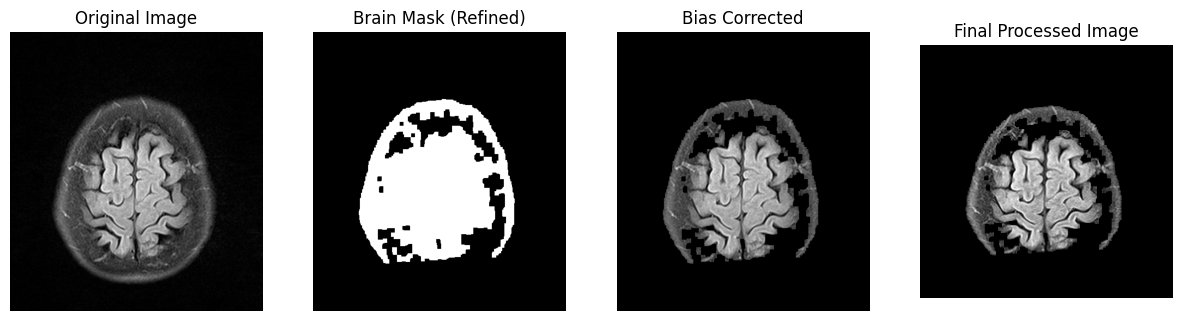

In [ ]:
import cv2
import numpy as np
import SimpleITK as sitk
import matplotlib.pyplot as plt

def preprocess_mri(image_path):
    # 1️⃣ Load Image in Grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # 2️⃣ Skull-Stripping with Otsu’s Thresholding
    _, brain_mask = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # 3️⃣ Morphological Refinement
    kernel = np.ones((7, 7), np.uint8)
    brain_mask = cv2.morphologyEx(brain_mask, cv2.MORPH_CLOSE, kernel)  # Remove small holes
    brain_mask = cv2.morphologyEx(brain_mask, cv2.MORPH_OPEN, kernel)   # Remove noise

    # Keep only largest connected component (Brain)
    num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(brain_mask, connectivity=8)
    largest_component = np.argmax(stats[1:, cv2.CC_STAT_AREA]) + 1  # Skip background
    brain_mask = np.uint8(labels == largest_component) * 255

    # 4️⃣ Apply Brain Mask
    brain_extracted = cv2.bitwise_and(image, image, mask=brain_mask)

    # 5️⃣ N4 Bias Field Correction
    sitk_image = sitk.GetImageFromArray(brain_extracted.astype(np.float32))
    mask = sitk.GetImageFromArray(brain_mask.astype(np.uint8))
    corrector = sitk.N4BiasFieldCorrectionImageFilter()
    corrector.SetMaximumNumberOfIterations([100, 100, 50, 30])  # More iterations for better correction
    corrected_image = corrector.Execute(sitk_image, mask)
    brain_corrected = sitk.GetArrayFromImage(corrected_image)

    # 6️⃣ Normalize Intensity (Z-score Normalization)
    brain_corrected = (brain_corrected - np.mean(brain_corrected)) / np.std(brain_corrected)

    # 7️⃣ Convert to uint8 for CLAHE
    brain_corrected = np.uint8((brain_corrected - brain_corrected.min()) / (brain_corrected.max() - brain_corrected.min()) * 255)

    # 8️⃣ CLAHE Contrast Enhancement
    clahe = cv2.createCLAHE(clipLimit=1.5, tileGridSize=(8, 8))
    brain_contrast = clahe.apply(brain_corrected)

    # 9️⃣ Resize to 256x256
    final_image = cv2.resize(brain_contrast, (256, 256))

    # 📌 Display Results
    fig, ax = plt.subplots(1, 4, figsize=(15, 5))
    ax[0].imshow(image, cmap='gray'); ax[0].set_title("Original Image")
    ax[1].imshow(brain_mask, cmap='gray'); ax[1].set_title("Brain Mask (Refined)")
    ax[2].imshow(brain_corrected, cmap='gray'); ax[2].set_title("Bias Corrected")
    ax[3].imshow(final_image, cmap='gray'); ax[3].set_title("Final Processed Image")
    for a in ax: a.axis("off")
    plt.show()

    return final_image

# Usage
preprocessed_img = preprocess_mri("/content/t2_tirm_tra_dark-fluid_pat2_023.png")


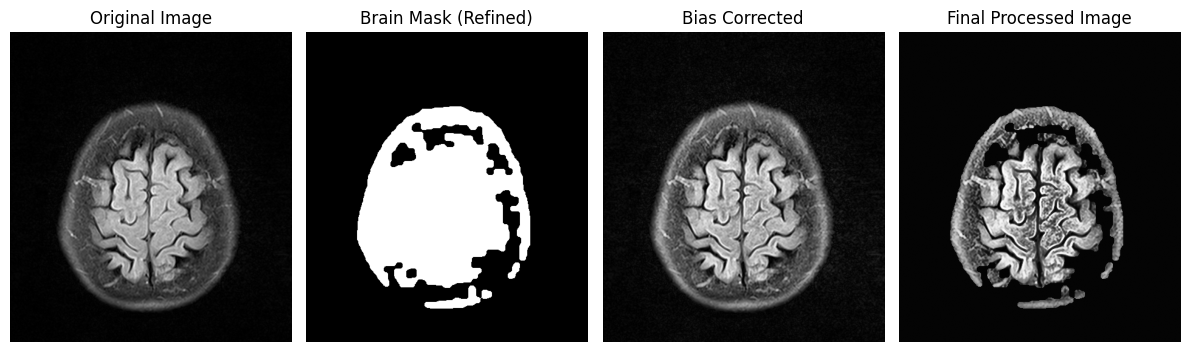

In [ ]:
import cv2
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from skimage import exposure

# Load MRI Image (Replace with your image path)
image = cv2.imread("/content/t2_tirm_tra_dark-fluid_pat2_023.png", cv2.IMREAD_GRAYSCALE)

# Step 1: Brain Mask Extraction using Otsu's Thresholding
_, brain_mask = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Step 2: Morphological Refinement (Improved)
kernel = np.ones((9, 9), np.uint8)  # Increased Kernel Size
brain_mask = cv2.morphologyEx(brain_mask, cv2.MORPH_CLOSE, kernel)  # Fill Gaps
brain_mask = cv2.morphologyEx(brain_mask, cv2.MORPH_OPEN, kernel)  # Remove Noise

# Step 3: Apply Median Filter to Remove Small Holes
brain_mask = cv2.medianBlur(brain_mask, 5)

# Step 4: Bias Field Correction (Adaptive Histogram Equalization)
clahe = cv2.createCLAHE(clipLimit=1.3, tileGridSize=(8, 8))  # Lower clip limit
bias_corrected = clahe.apply(image)

# Step 5: Extract Brain by Applying the Mask
brain_extracted = cv2.bitwise_and(bias_corrected, bias_corrected, mask=brain_mask)

# Step 6: Final Contrast Adjustment using Histogram Equalization
final_image = exposure.equalize_adapthist(brain_extracted, clip_limit=0.02)  # Smooth enhancement

# Convert to 8-bit image for display
final_image = (final_image * 255).astype(np.uint8)

# Plot Results
fig, axes = plt.subplots(1, 4, figsize=(12, 4))
titles = ["Original Image", "Brain Mask (Refined)", "Bias Corrected", "Final Processed Image"]
images = [image, brain_mask, bias_corrected, final_image]

for ax, img, title in zip(axes, images, titles):
    ax.imshow(img, cmap="gray")
    ax.set_title(title)
    ax.axis("off")

plt.tight_layout()
plt.show()


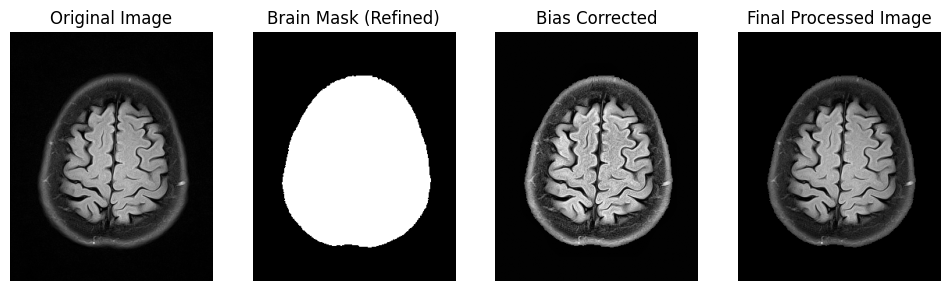

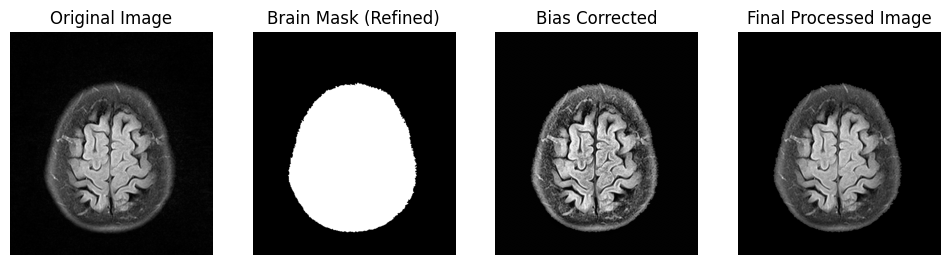

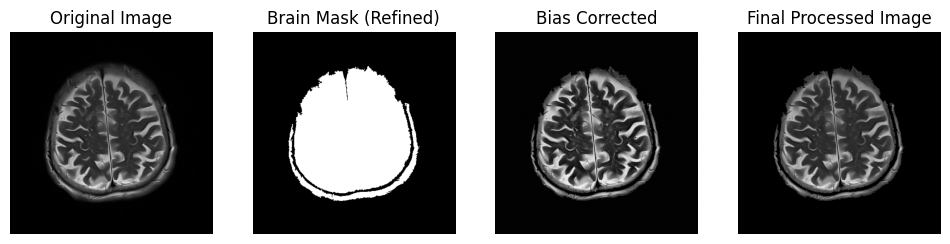

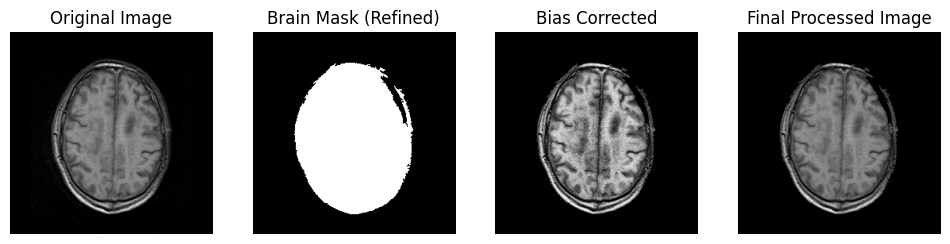

In [ ]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from skimage import morphology
from scipy.ndimage import binary_fill_holes

# Function to preprocess a single image
def preprocess_mri(image_path):
    # Read the image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply thresholding to create an initial brain mask
    _, brain_mask = cv2.threshold(img, 50, 255, cv2.THRESH_BINARY)

    # Perform morphological operations to refine the mask
    brain_mask = morphology.remove_small_objects(brain_mask.astype(bool), min_size=500).astype(np.uint8)
    brain_mask = binary_fill_holes(brain_mask).astype(np.uint8)

    # Apply mask to extract brain region
    extracted_brain = cv2.bitwise_and(img, img, mask=brain_mask)

    # Bias correction using CLAHE (adaptive histogram equalization)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    bias_corrected = clahe.apply(extracted_brain)

    return img, brain_mask * 255, bias_corrected, extracted_brain

# Process multiple images in a directory
def process_mri_images(image_list, output_dir="processed_images"):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for image_path in image_list:
        filename = os.path.basename(image_path)
        original, brain_mask, bias_corrected, final_processed = preprocess_mri(image_path)

        # Save results
        cv2.imwrite(os.path.join(output_dir, f"mask_{filename}"), brain_mask)
        cv2.imwrite(os.path.join(output_dir, f"bias_corrected_{filename}"), bias_corrected)
        cv2.imwrite(os.path.join(output_dir, f"final_{filename}"), final_processed)

        # Display results
        fig, axes = plt.subplots(1, 4, figsize=(12, 4))
        axes[0].imshow(original, cmap='gray')
        axes[0].set_title("Original Image")
        axes[1].imshow(brain_mask, cmap='gray')
        axes[1].set_title("Brain Mask (Refined)")
        axes[2].imshow(bias_corrected, cmap='gray')
        axes[2].set_title("Bias Corrected")
        axes[3].imshow(final_processed, cmap='gray')
        axes[3].set_title("Final Processed Image")

        for ax in axes:
            ax.axis("off")

        plt.show()

# Example usage
image_paths = ["/content/t2_tirm_tra_dark-fluid_022.png", "/content/t2_tirm_tra_dark-fluid_pat2_023.png", "/content/t2_tse_tra_p2_512_019.png", "/content/T1W_FFE_018.png"]  # Replace with actual image paths
process_mri_images(image_paths)


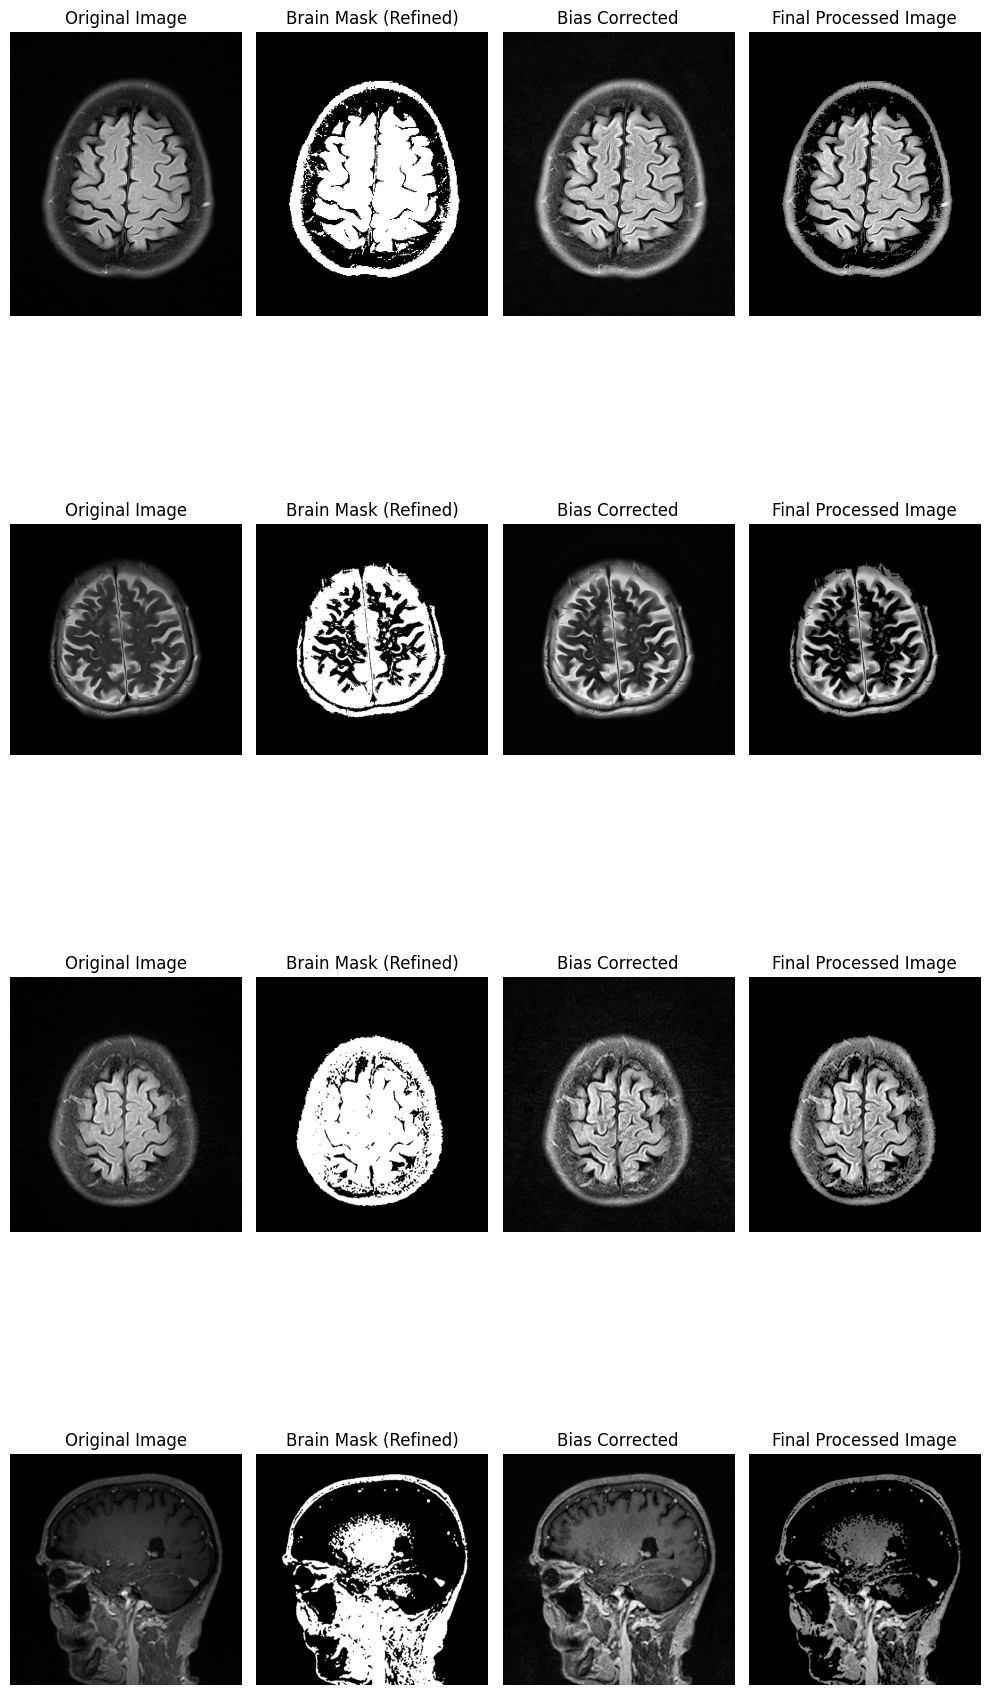

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def load_image(image_path):
    """Loads a PNG image in grayscale."""
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"Cannot load image: {image_path}")
    return img

def apply_brain_mask(image):
    """Generates a binary mask using thresholding."""
    _, mask = cv2.threshold(image, 50, 255, cv2.THRESH_BINARY)
    return mask

def bias_correction(image):
    """Applies CLAHE (Contrast Limited Adaptive Histogram Equalization) for bias correction."""
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    corrected = clahe.apply(image)
    return corrected

def process_images(image_paths):
    """Processes multiple images and displays them."""
    num_images = len(image_paths)
    fig, axes = plt.subplots(num_images, 4, figsize=(10, 5 * num_images))

    if num_images == 1:
        axes = [axes]  # Ensure axes is always iterable for a single image

    for i, path in enumerate(image_paths):
        original = load_image(path)
        brain_mask = apply_brain_mask(original)
        bias_corrected = bias_correction(original)
        final_image = cv2.bitwise_and(bias_corrected, bias_corrected, mask=brain_mask)

        # Plot the results
        axes[i][0].imshow(original, cmap='gray')
        axes[i][0].set_title("Original Image")
        axes[i][0].axis("off")

        axes[i][1].imshow(brain_mask, cmap='gray')
        axes[i][1].set_title("Brain Mask (Refined)")
        axes[i][1].axis("off")

        axes[i][2].imshow(bias_corrected, cmap='gray')
        axes[i][2].set_title("Bias Corrected")
        axes[i][2].axis("off")

        axes[i][3].imshow(final_image, cmap='gray')
        axes[i][3].set_title("Final Processed Image")
        axes[i][3].axis("off")

    plt.tight_layout()
    plt.show()

# Example Usage
image_paths = [
    "/content/t2_tirm_tra_dark-fluid_022.png",
    "/content/t2_tse_tra_p2_512_019.png",
    "/content/t2_tirm_tra_dark-fluid_pat2_023.png",
    "/content/t1_mprage_sag_p2_iso_1_069.png"
]  # Update with actual file paths

process_images(image_paths)
